### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

#### Loading Data

In [2]:
gold_data = pd.read_csv("./gld_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Rows, Columns
gold_data.shape

(2290, 6)

#### Checking Around the Data

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Data does not contain any missing value

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Correlation

In [8]:
corr_gold_data = gold_data.corr()

<AxesSubplot:>

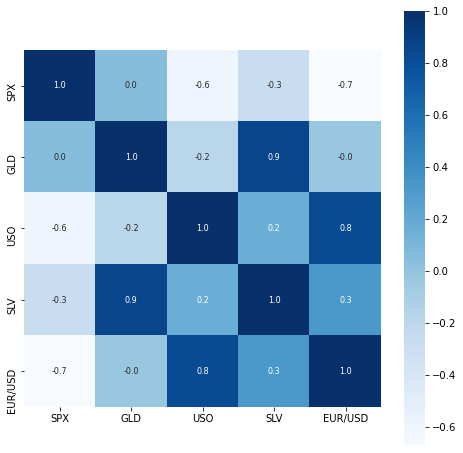

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_gold_data,
            cbar=True,
            square=True,
            fmt=".1f",
            annot=True,
            annot_kws = {'size':8},
            cmap = 'Blues'
        )

#### Distribution Plots

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

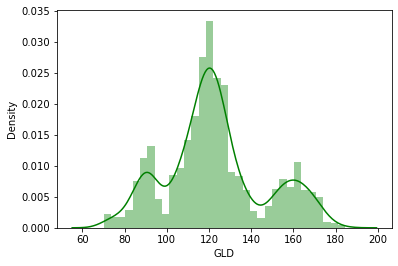

In [10]:
sns.distplot(gold_data['GLD'], color='green')

### Data Splitting

In [11]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

#### Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Model Training

In [13]:
regressor = RandomForestRegressor(n_estimators=100)

In [14]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [15]:
test_data_prediction = regressor.predict(X_test)

In [16]:
y_test_list=list(y_test)

In [17]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [18]:
test_data_prediction_Series = pd.Series(test_data_prediction)
test_data_prediction_Series

0      168.492499
1       81.870100
2      116.295401
3      127.720901
4      120.793201
          ...    
453    166.862999
454    108.287499
455    121.807999
456    138.613801
457    106.359899
Length: 458, dtype: float64

In [19]:
# R squared error
r2_error_score = metrics.r2_score(y_test, test_data_prediction)
r2_error_score

0.9892678728487088

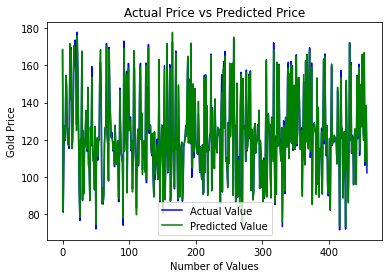

In [20]:
plt.plot(y_test_list, color= 'blue', label= 'Actual Value')
plt.plot(test_data_prediction, color= 'green', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

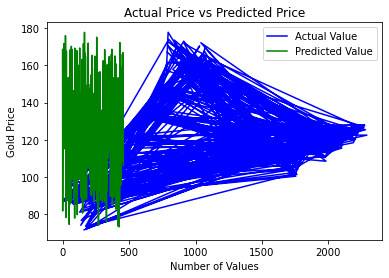

In [21]:
plt.plot(y_test, color= 'blue', label= 'Actual Value')
plt.plot(test_data_prediction_Series, color= 'green', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()